(470, 626, 4)


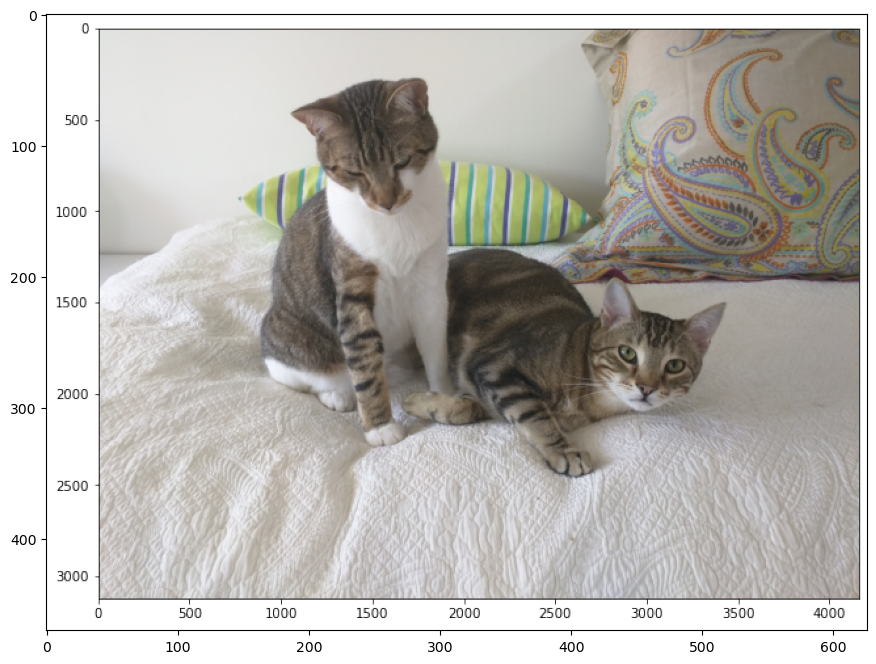

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_raw = imread("cat.jpg")
print(image_raw.shape)

plt.figure(figsize=[12,8])
plt.imshow(image_raw)

In [10]:
(3120, 4160, 3)

(3120, 4160, 3)

(470, 626)
1.0


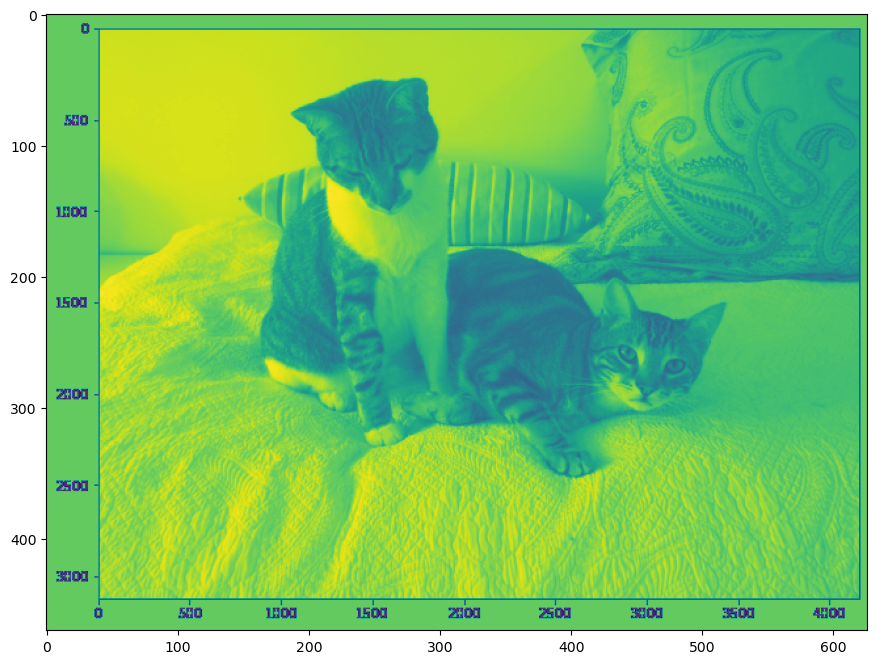

In [3]:
#let's change this to a grayscale image to remove the RGB value
# Show the new shape of the image
image_sum = image_raw.sum(axis=2)
plt.figure(figsize=[12,8])
plt.imshow(image_sum)
print(image_sum.shape)

# Show the max value at any point.  1.0 = Black, 0.0 = White
image_bw = image_sum/image_sum.max()
print(image_bw.max())

In [4]:
#Next we can fit our grayscale image with PCA from Scikit-Learn
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
pca.fit(image_bw)

PCA()

In [5]:
#After the image is fit, we have the method pca.explained_variance_ratio_ which returns the percentage of variance explained by each of the principal components
# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

In [6]:
#Utilizing np.cumsum we can add up each of the variance per component until it reaches 100% for the final component
# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

Number of components explaining 95% variance: 32


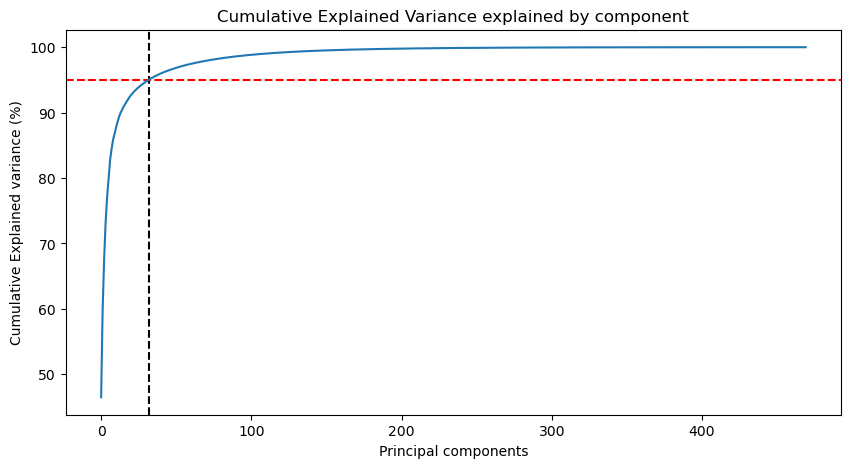

In [7]:
#We'll plot this on a line and show where 95% of explianed variace would be
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [8]:
#By printing off the length of components, we can see that there are 470 components overall
len(pca.components_)

470

In [9]:
#What's crazy about this is that with PCA, we only need to use 32 of the original 470 components
#to explain 95% of the variance in the image! That's quite incredible.

In [10]:
#Reducing Dimensionality with PCA

In [10]:
#We'll use the fit_transform method from the IncrementalPCA module to first find the 32 PCs and transform and represent the data in those 32 new components/columns
ipca = IncrementalPCA(n_components=k)

In [11]:
#we'll reconstruct the original matrix from these 54 components using the inverse_transform method
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

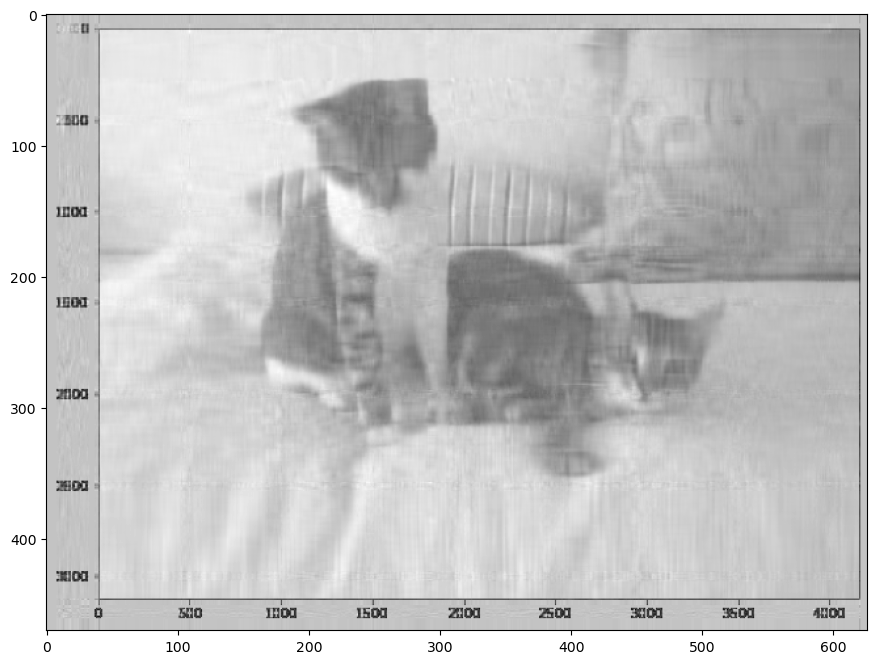

In [13]:
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

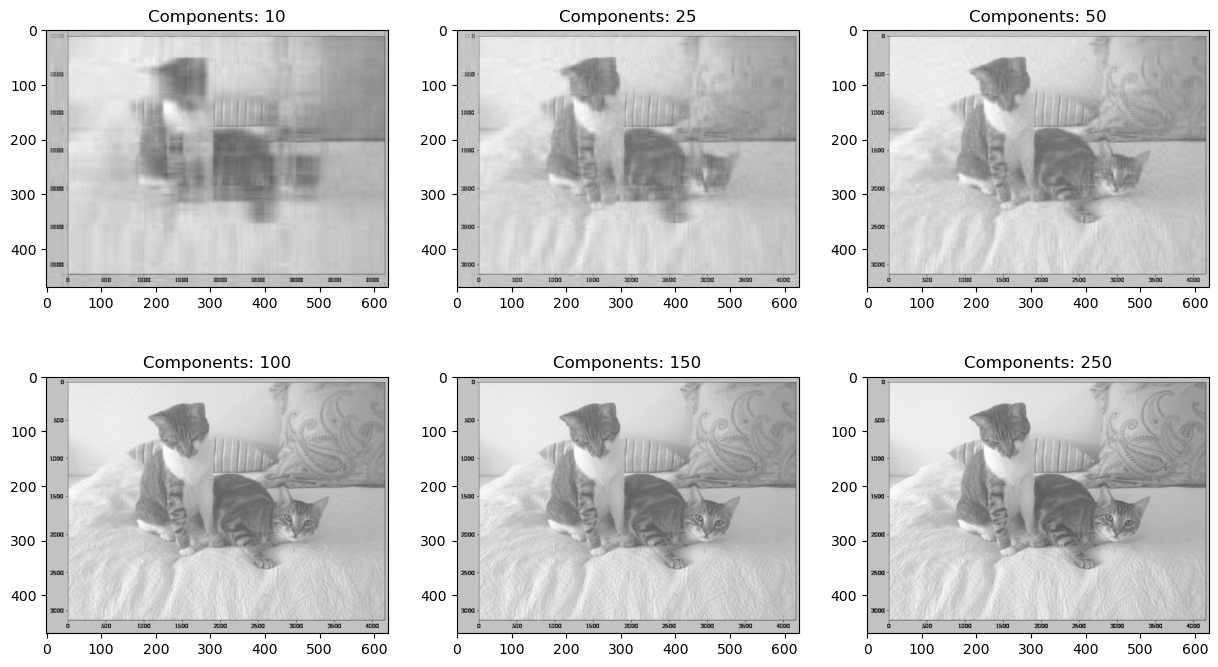

In [12]:
#Showing other Values for k-Dimensions
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)

ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
